In [13]:
import pandas as pd
import networkx as nx
import numpy as np
import os
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms import bipartite

In [2]:
# Load the dataset
data = pd.read_csv("twitter_cross_platform.csv")

# Convert `nodeTime` to datetime
data['nodeTime'] = pd.to_datetime(data['nodeTime'])

# Filter relevant columns
data = data[['nodeUserID', 'videoID', 'nodeTime']]

In [3]:
# Create an empty bipartite graph
G = nx.Graph()

# Add nodes and edges
for _, row in data.iterrows():
    user = row['nodeUserID']
    video = row['videoID']
    time = row['nodeTime']
    
    # Add user and video nodes
    G.add_node(user, bipartite=0)  # Users
    G.add_node(video, bipartite=1)  # Videos
    
    # Add an edge between user and video with a timestamp
    G.add_edge(user, video, time=time)

# Find the largest connected component
largest_cc = max(nx.connected_components(G), key=len)

# Create a subgraph with the largest connected component
G_largest = G.subgraph(largest_cc).copy()


In [12]:
# Check connected components
components = list(nx.connected_components(G))
print(f"Number of connected components: {len(components)}")

# Largest connected component
largest_component = max(components, key=len)
print(f"Size of the largest component: {len(largest_component)}")



Number of connected components: 116
Size of the largest component: 5235


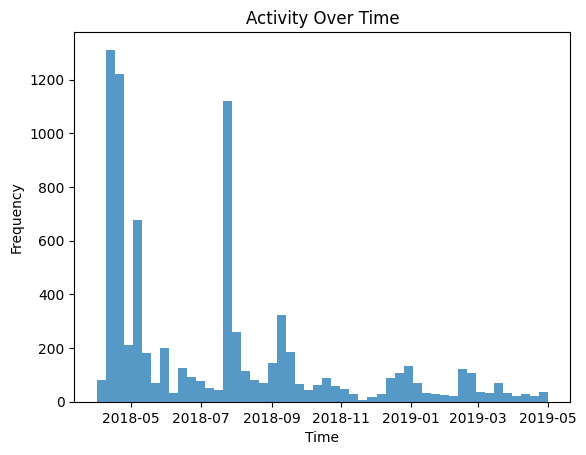

In [21]:

# Extract edge timestamps
timestamps = [d['time'] for _, _, d in G_largest.edges(data=True)]

# Plot activity histogram
plt.hist(timestamps, bins=50, alpha=0.75)
plt.title("Activity Over Time")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

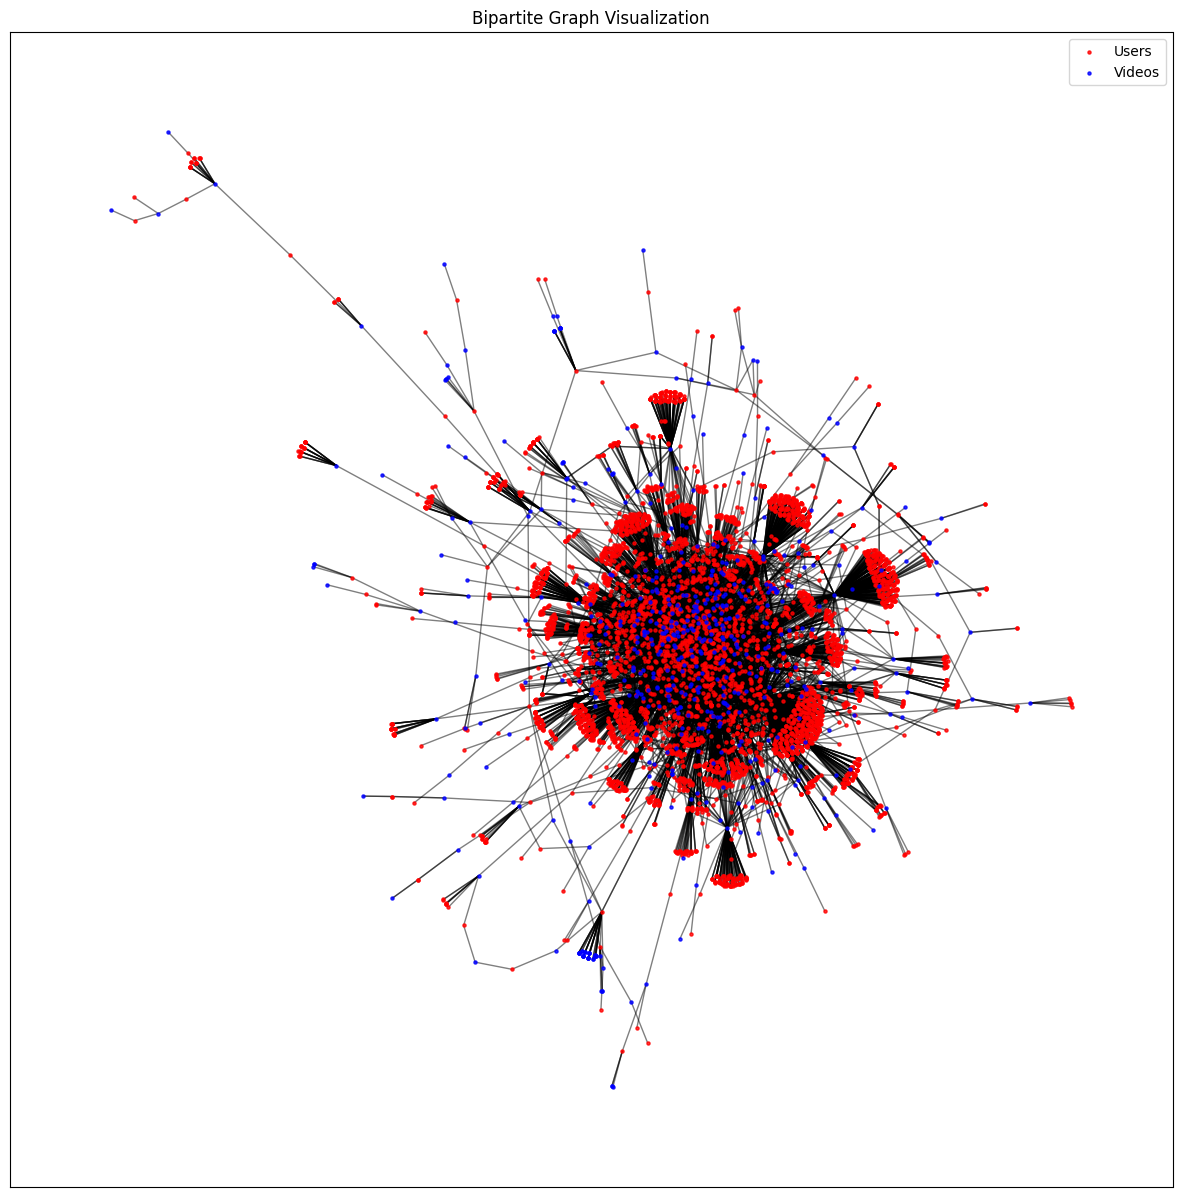

In [9]:
# Visualize the Graph
# Visualize the Graph
plt.figure(figsize=(15, 15))  # Set the figure size (width, height) in inches
pos = nx.spring_layout(G_largest)  # positions for all nodes

# Separate the nodes by bipartite set
users = {n for n, d in G_largest.nodes(data=True) if d['bipartite'] == 0}
videos = set(G_largest) - users

# Draw the nodes
nx.draw_networkx_nodes(G_largest, pos, nodelist=users, node_color='r', node_size=5, alpha=0.8, label='Users')
nx.draw_networkx_nodes(G_largest, pos, nodelist=videos, node_color='b', node_size=5, alpha=0.8, label='Videos')

# Draw the edges
nx.draw_networkx_edges(G_largest, pos, width=1.0, alpha=0.5)


# Add legend
plt.legend(scatterpoints=1)
plt.title('Bipartite Graph Visualization')
plt.show()

In [26]:
from networkx.algorithms import bipartite

# Compute sets of connected components in the bipartite graph
sets = list(connected_components(G_largest))
for i, component in enumerate(sets):
    print(f"Cluster {i+1}: {component}")

Cluster 1: {'iEFz1998ANieUfzfkawDRA', '-bgEP5LLccnJqoo_PDDS9w', 'X32qhfObqu_IbtgBicX-fQ', '0bic8a-69eVNko5StlNvcQ', 'hE9nTITYp8S4NOL5dgrnRg', 'weIm5Xm76EMtqN-V42IKhw', 'Q1sNm8Pqwv-T_OMSx4tcSQ', 'xxgU4MUxg0xrLoD-WRJGzA', 'qfQziHg-dAqsd70FpgE7Ow', 'symGEP2LLScFVMkdRVY9rg', 'NkAqRyDwW6toh9TVKK3vkA', 'GA9FgyGXvCTZJUBGgyffzg', 'y6BoCU8cccP2OyKINqV9Og', 'DQFFxgcgE2belaR7Zlc9ZQ', 'IflwXZlk4h2M2VF5lfhPFQ', 'IiTv1Wxlu4_k23DVYVXAuQ', 'U2545Zy5C482TZBAWe_c-g', 'otpJXmhJHllCxVMnBlG-TQ', 'N45B6h19fk0', 'oR6OXKJ4mpKTrx3S6rzmXg', 'xJaDuDYvUKKuVWBsNp--Rg', 'HiTZ-27Z3b5ZpN0Hz4v89w', 'wrhpvwMKaKOebRzOpkNjnw', 'a59_5Ki0jerliL7i_fya8A', 'QmmgVFsrqUS_WJCNCDWIXQ', '3XcffWRG9WsvKzxtx0I4aw', 'mzg0lmhmBYbuR6tE5yPvqw', 'ojQN3jRpSSzG_B9YmnT0Qw', 'qf771umLuR28Nw1ppp9HVA', 'OGloLxWNVW0tKfMEwMMPyQ', 'pPpDHWlirRPDLvevRfeSVw', '8wujZEBiMBP_g4V_7uAGFA', 'o3xZjrLpHus', 'SOBKmBIMQrNwpH5YNfLeQw', '2LmPlqRGhK9rXH21LjHGNA', 'YmPHTKDfLSWMjvLVijdOWw', 'AjddxpYMsTNbY6XtJ0twbA', 'BEKJRIc2pdpGg7A-M_z_SA', '4sEULZVe6OfgQ02UgKt-z

In [7]:
# Identify connected components in the bipartite graph
clusters = list(connected_components(G_largest))

# Separate clusters into individual groups
user_clusters = [set(c for c in cluster if G_largest.nodes[c].get('bipartite') == 0) for cluster in clusters]
video_clusters = [set(c for c in cluster if G_largest.nodes[c].get('bipartite') == 1) for cluster in clusters]

# Print cluster sizes
for i, (uc, vc) in enumerate(zip(user_clusters, video_clusters)):
    print(f"Cluster {i+1}: {len(uc)} users, {len(vc)} videos")

Cluster 1: 4704 users, 531 videos


In [10]:
user_projection = bipartite.weighted_projected_graph(G_largest, users)

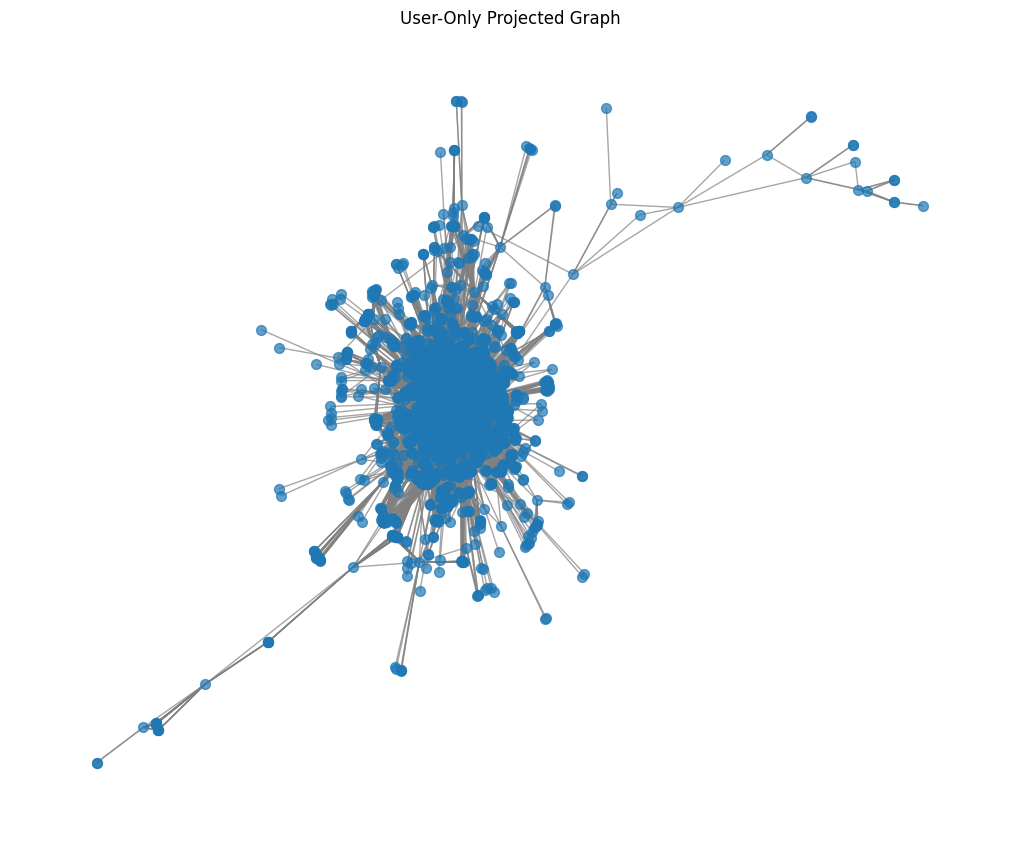

In [12]:
# Draw the user-only graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(user_projection)
nx.draw(
    user_projection,
    pos=pos,
    with_labels=False,
    node_size=50,
    edge_color="gray",
    alpha=0.7
)

# Add edge labels for weights
# edge_labels = nx.get_edge_attributes(user_projection, 'weight')
# nx.draw_networkx_nodes(user_projection, pos, node_size=50, node_color='r')
# nx.draw_networkx_edges(user_projection, pos, alpha=0.5)
# nx.draw_networkx_edge_labels(user_projection, pos, edge_labels=edge_labels, font_size=8)
plt.title("User-Only Projected Graph")
plt.show()

In [14]:
communities = greedy_modularity_communities(user_projection)

# Print communities
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

Community 1: frozenset({'rBVAxKSXwPpFMMVLNvNiAA', '5iZA7XKdronULzrzo78uQg', 'oI64HnGdm796PtsasMA-Xg', 'G44cZDnpAud1X6u_6Zh3aQ', 'FBOFzkjmdEEMUBqyEF0BYA', 'FUixfxn4D4qNck-vdG6qEg', 'Sfh9jCPFSRZOyOjyJRyA-g', 'Gd1KjzOSQOSzPDxMKgJv2w', 'UL__E5iXcdyIxzHdaVuC7g', 'aQ1kje2kTxPW3s4RUj4nPQ', 'YxfJWkxZ2cRxpTQTGO8K7Q', 'jmcJMbxf-dwkgPYQFGRbbw', 'XDHOo21Fs4DlHBH6u7OfWA', 'u1Mx1qQA1yawJlLQYmqW3w', 'IRw-lY1oGG_7KPZwnL-ogA', 'FKLYs2Yoewwx83B9B-LD5A', '2N5RYhnRptZf0LB_K7TQGg', '8uFYEc53kppJ-6bTtHbrwg', 'kWYc2neDwiWJTcMahMmlCQ', 'l4BOsAV6GikRT30UVt7Gcg', 'hzuZuOyEmSVlZtAX_u8mpQ', 'LUkcJ47PkJ5McsLuGCPKoA', 'h9yToVbXXNs_zqq7a9a4zQ', 'zo0ku_7ZG2jHD9KonXakdA', 'si1FL1U8iFzGSI7LuxDFlg', 'J6MwWY8p6aI6xgAOPzWK9g', 'GJTHrbddcQc342pAcf340w', '7T7YPp-Ntc1ctwV86E2aJA', 'ojQN3jRpSSzG_B9YmnT0Qw', 'mSfFmrt49AxYG4xMlrtwyw', 'WaUWzOhh8JtxmOiZCNroZw', 'k9usWLdAyDYNvW0dvC32FA', 'HM6oeOrmZf5-DUXOC63bOA', 'ut2TA4EdyU6Honfg5iVhew', 'aLdwFRVhUl0nKVn4QK_-AA', 'jX4eo5ifeSIXcxViVJRZgA', 'jNK5uMWYch-GSgmAOSkWDw', 'aU9qPCOgmNGLG

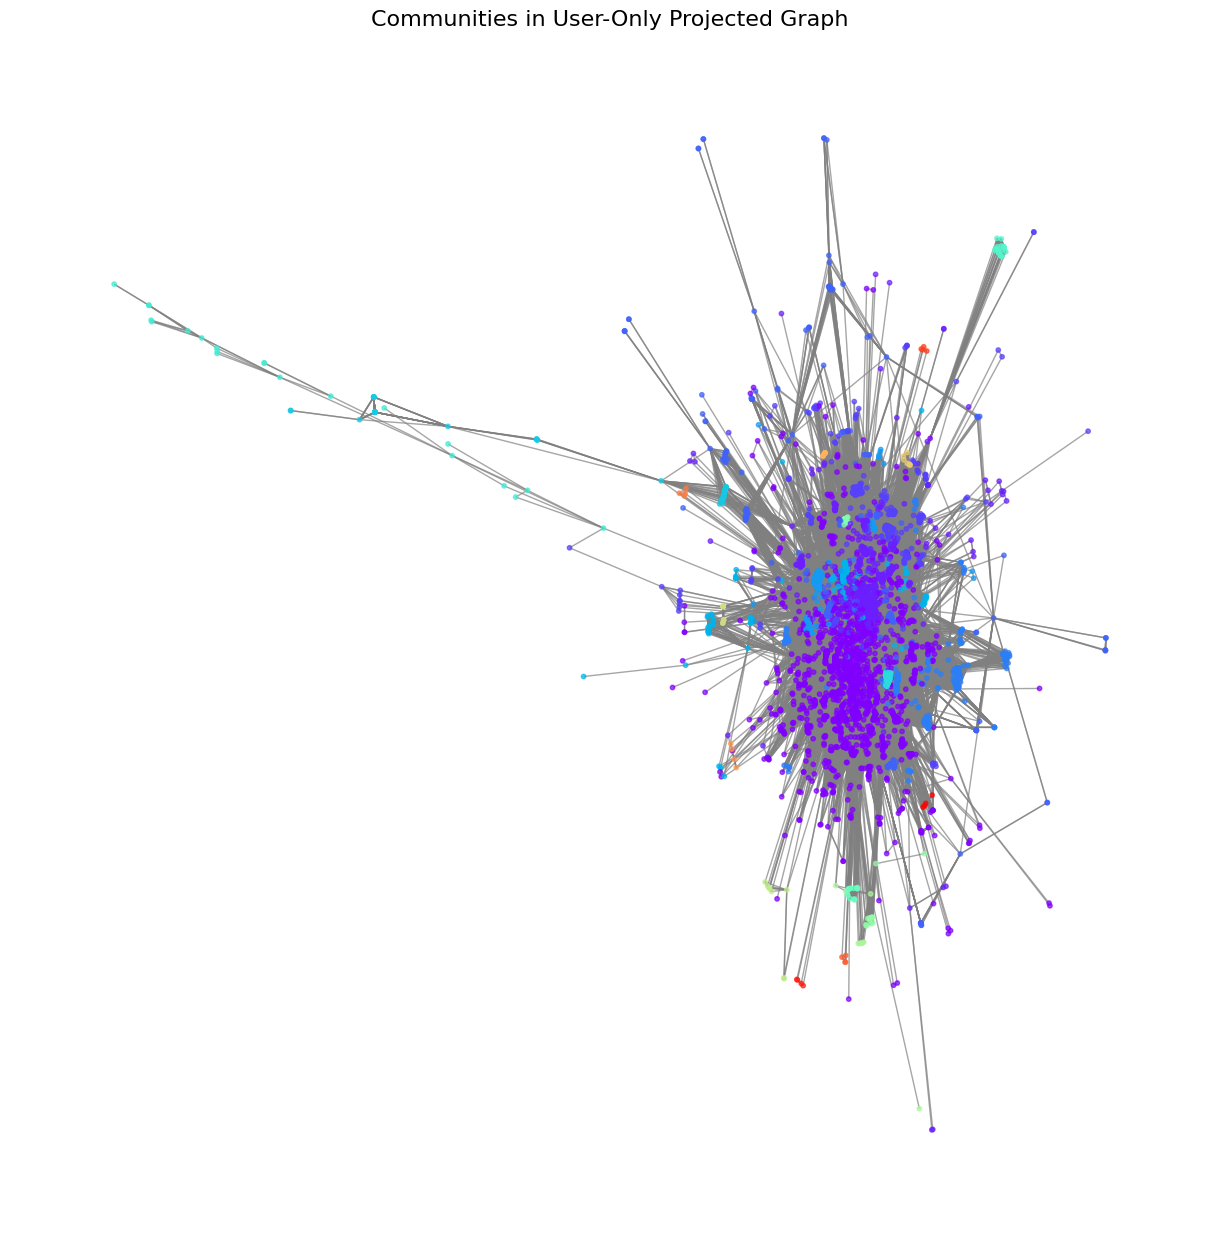

In [17]:
node_community_map = {}
for i, community in enumerate(communities):
    for node in community:
        node_community_map[node] = i
# Assign a color to each community
colors = [node_community_map[node] for node in user_projection.nodes]

# Visualize the graph with communities
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(user_projection)  # Layout for positioning nodes
nx.draw(
    user_projection,
    pos,
    with_labels=False,
    node_color=colors,
    node_size=10,
    cmap=plt.cm.rainbow,  # Use a colormap for community colors
    edge_color="gray",
    alpha=0.7
)
plt.title("Communities in User-Only Projected Graph", fontsize=16)
plt.show()